In [1]:
# add path to sispeuede to sys.path in python
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")


path_git = pathlib.Path("/Users/usuario/git")
for subdir in [
    "sisepuede", 
    "sisepuede_data_pipeline",
    # "sisepuede_juypyter"
]:
    path_cur = path_git.joinpath(subdir)
    if str(path_cur) not in sys.path:
        sys.path.append(str(path_cur))

path_pipeline = path_git.joinpath("sisepuede_data_pipeline")


import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import sisepuede.manager.sisepuede_examples as sxl
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.plotting.plots as spp
import sisepuede.utilities._plotting as spu
import sisepuede.core.support_classes as sc
import sisepuede.utilities._toolbox as sf
import time
from typing import *


import lib.process_utilities as pu
import lib.sisepuede_data_constructs as dc
import lib._util as lutil




In [2]:
##  SETUP DIRECTORIES

path_cur = pathlib.Path(os.getcwd())
path_data = path_cur.joinpath("data")
path_transformations = path_cur.joinpath("transformations_peru")


##  SETUP FILES

path_data_calib = path_data.joinpath("input_all_sectors_peru.csv")
path_data_base = path_data.joinpath("real_data_TZA_PER_LKA_20250210.csv")
path_data_built = path_data.joinpath("sisepuede_raw_global_inputs_peru.csv")


##  SETUP SOME PIPELINE STUFF


file_struct = sfs.SISEPUEDEFileStructure()

# assign some shortcuts
matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)


##  SOME GLOBALS

_REGION_NAME = "peru"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso", )


# Build transformations from completed raw file for 202506 model

In [3]:
df_peru = pd.read_csv(path_data_built)


In [4]:
import sisepuede.models.afolu as mafl
model_afolu = mafl.AFOLU(matt, )
df_tmp = model_afolu(df_peru, )

In [5]:
df_tmp[[x for x in df_tmp.columns if "emission_co2e" in x and "frst" in x]]

,emission_co2e_co2_frst_sequestration_mangroves,emission_co2e_co2_frst_sequestration_primary,emission_co2e_co2_frst_sequestration_secondary,emission_co2e_ch4_frst_methane_mangroves,emission_co2e_ch4_frst_methane_primary,emission_co2e_ch4_frst_methane_secondary,emission_co2e_co2_frst_forest_fires,emission_co2e_co2_frst_harvested_wood_products,emission_co2e_subsector_total_frst
0,-1.137072,-92.767612,-47.365821,0.006892,1.667842,0.417606,0.003309,-0.037048,-139.211903
1,-1.150382,-92.580890,-47.200723,0.006973,1.664503,0.416223,0.003300,-0.041338,-138.882333
2,-1.141941,-92.466958,-47.110078,0.006922,1.662495,0.415469,0.003294,-0.109525,-138.740322
3,-1.153162,-92.278418,-46.956938,0.006990,1.659164,0.414117,0.003285,-0.147161,-138.452123
4,-1.119448,-92.150736,-46.836057,0.006785,1.656895,0.413083,0.003278,-0.209667,-138.235868
5,-1.169686,-92.015931,-46.783314,0.007090,1.654395,0.412561,0.003273,-0.237184,-138.128795
6,-1.201207,-91.877192,-46.717855,0.007281,1.651901,0.411983,0.003269,-0.018611,-137.740431
7,-1.211993,-91.738339,-46.642561,0.007346,1.649404,0.411319,0.003263,-0.264806,-137.786366
8,-1.235332,-91.599902,-46.577105,0.007488,1.646915,0.410742,0.003259,-0.298474,-137.642410
9,-1.242940,-91.461457,-46.504552,0.007534,1.644426,0.410102,0.003254,-0.270165,-137.413798


In [6]:
#df_peru.to_csv(path_data_built, encoding = "UTF-8", index = None, )


In [22]:
import sisepuede.transformers as trf

transformers = trf.Transformers(
    {},
    df_input = df_peru,
)

# initialize a transformations set
if not path_transformations.is_dir():
    trf.instantiate_default_strategy_directory(
        transformers,
        path_transformations,
    )

transformations = trf.Transformations(
    path_transformations,
    transformers = transformers,
)

strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)




##  Phase 1 for transformations: run transformations one by one using defaults
- start by building all singletons to the templates to run

In [132]:

##  GET IN
strat_names = [
    x for x in strategies.attribute_table.table[strategies.field_strategy_name].to_numpy() 
    if x.startswith("Singleton")
]

# init
all_strategies_singleton = [strategies.baseline_id]

# add to list
for strat in strategies.all_strategies:
    nm = strategies.get_strategy(strat).name
    if nm in strat_names:
        all_strategies_singleton.append(strat)




# build templates--trajectory groups are not important right now
examples = sxl.SISEPUEDEExamples()
df_vargroups = examples("variable_trajectory_group_specification")
strategies.build_strategies_to_templates(
    #df_trajgroup = df_vargroups, 
    include_simplex_group_as_trajgroup = True,
    strategies = [0, 6002, 6003],
)


0

In [24]:
strategies.build_strategies_to_templates(
    #df_trajgroup = df_vargroups, 
    include_simplex_group_as_trajgroup = True,
    strategies = [0, 6002, 6003],
)

0

# Code to build estimate magnitudes
- This is very crude
- Adjusts magnitudes in line with July 2025 process to run, check different, then adjust magnitudes as needed


In [17]:
_CODE_AA = "PFLO:ALL"

# get the strategy and extract transformations
strat_all_actions = strategies.get_strategy(_CODE_AA)

transformations_all_actions = strat_all_actions.get_transformation_list(
    strat_all_actions.transformation_specification,
    strategies.transformations,
)

all_codes_aa = [x.code for x in transformations_all_actions]
all_names_aa = [x.name for x in transformations_all_actions]



##  GET THE SCALARS TO APPLY TO MAGNITUDES

_FIELD_MAGNITUDE = "frac_of_magnitude"

dict_replace = {
    "AGRC: Increase crop productivity": "AGRC: Improve crop productivity",
    "LNDU: Increase reforestation": "LNDU: Increase Reforestation",
    "LVST: Increase livestock producitivity": "LVST: Increase livestock productivity",
    "WALI: Improve rural wastewater treatment": "WALI: Improved rural wastewater treatment",
    "WALI: Improve urban wastewater treatment": "WALI: Improved urban wastewater treatment",
    "ENTC: 95% RE": "ENTC: 95% of electricity is generated by renewables in 2050",
    "INEN: Maximize industry energy efficiency": "INEN: Maximize industrial energy efficiency",
    "INEN: Fuel switch high & low-temp thermal processes": "INEN: Fuel switch high- and low-temp thermal processes",
    "SCOE: Switch to electricity for heat using heat pumps, electric stoves & etc": "SCOE: Switch to electricity for heat using heat pumps, electric stoves, etc.",
    "TRNS: Increase non-electric transportation efficiency": "TRNS: Increase non-electric transportation energy efficiency",
    "TRNS: Mode shift passenger vehicle": "TRNS: Mode shift passenger vehicles to others"
}


def get_magnitude_scalars(
    path: pathlib.Path,
    field_magnitude: str = _FIELD_MAGNITUDE,
    field_denom: str = "Emission Change for Transformation (All CO2 Emission Fields)",
    field_num: str = "Peru mitigation 2030 (MtCO2eq)",
    fields_index: List[str] = [matt.dim_primary_id, strategies.key_strategy, transformers.field_transformer_name],
    **kwargs
) -> pd.DataFrame:
    """Retrieve scalars for Peru magnitude
    """
    df_vals = (
        pd.read_excel(path, **kwargs, )
        .dropna(
            subset = [field_denom, field_num], 
            how = "any",
        )
        .rename(
            columns = {"strategy_name": strategies.field_strategy_name, }
        )
    )

    
    # estimate magnitude scalar
    vec_new = np.nan_to_num(
        -1*df_vals[field_num].values/df_vals[field_denom].values,
        nan = 1.0,
        posinf = 1.0,
    )
    vec_new = sf.vec_bounds(vec_new, (0, 1))
    vec_new[vec_new == 0] = 1.0              # 0s are not correct, just set to 100% for now
    df_vals[field_magnitude] = vec_new

    # update names

    all_transformer_names = [transformers.get_transformer(x).name for x in transformers.all_transformers]
    nms = []
    
    for i, row in df_vals.iterrows():
        nm = str(row["sector"])
        nm2 = str(row[strategies.field_strategy_name])
        nm = f"{nm}: {nm2}"
        nm = dict_replace.get(nm, nm)
            
        if nm not in all_transformer_names:
            print(f"WARNING: name {nm} not found at {i}. Print{row}")
            
            #dict_update.update({nm: "",})
        nms.append(nm)

        

    df_vals[transformers.field_transformer_name] = nms
    
    
    # reduce 
    df_vals = df_vals.get(fields_index + [field_magnitude], )

    return df_vals
    




path_magnitude_scalars = path_data.joinpath("Peru SiSePuede Results - JS July2025 - update_grouped0716_transformation_estimates.xlsx")
df_magnitude_scalars = get_magnitude_scalars(
    path_magnitude_scalars,
    sheet_name = "3-Denominator",
)

dict_transformer_to_scalar = sf.build_dict(df_magnitude_scalars[[transformers.field_transformer_name, _FIELD_MAGNITUDE]])





##  update the attribute table if needed

In [18]:
def copy_to_ndc_two(
    transformations: 'Transformations',
    all_codes: List[str],
    dict_magnitude_scalar: Dict[str, float],
    append: str = "NDC2020_EST",
    export: bool = False,
    key_magnitude: str = "magnitude", 
    key_tp0: str = "tp_0_ramp",
    key_vir: str = "vec_implementation_ramp",
) -> None:
    """Copy NDC transformations to NDC 2.0 with time starting in 2020
    """
    paths_transformations_cur = transformations.dict_paths.get(
        transformations.key_path_transformations, 
    )

    all_codes2 = []

    # iterate over each path
    for path in paths_transformations_cur:

        # get and check the code associated with this YAML
        transformation = trf.Transformation(
            path,
            transformations.transformers,
        )
        
        # skip any non-ndc transformations
        if transformation.code not in all_codes:
            continue


        ##  UPDATE YAML - START WITH IMPLEMENTATION RAMP
            
        # get the parameters and update the start time
        dict_yaml = sf.read_yaml(path, munchify_dict = False, )
        dict_params = dict_yaml.get(transformation.key_parameters, )

        # get the ramp from parameters and update as necessary
        code_transformer = transformation.transformer_code
        name_transformer = transformers.get_transformer(code_transformer, ).name
        mag = dict_params.get(key_magnitude, )

        # files
        special_case_path_stems = [
            "transformation_agrc_inc_conservation_agriculture",
            "transformation_inen_shift_fuel_heat",
            "transformation_lvst_dec_enteric_fermentation",
            "transformation_wali_inc_treatment_rural",
            "transformation_wali_inc_treatment_urban",
            "transformation_waso_inc_anaerobic_and_compost"
        ]
        
        # continue on?
        if (mag is None) and (path.stem not in special_case_path_stems):
            if name_transformer in dict_magnitude_scalar.keys():
                print(f"NOTE! {key_magnitude} not found at path {path.stem}")
            continue
            
        scalar = dict_magnitude_scalar.get(name_transformer, 0.5)
        if scalar is None:
            print(f"No scalar found for transformation at path {path.stem}...")
            continue


        if path.stem not in special_case_path_stems:
            # update param dict and YAML
            dict_params.update({key_magnitude: mag*scalar, })

        else:
            if path.stem == "transformation_agrc_inc_conservation_agriculture":
                dict_new = {
                    "cereals": 0.8,
                    "fibers": 0.8,
                    "other_annual": 0.8,
                    "pulses": 0.5,
                    "tubers": 0.5,
                    "vegetables_and_vines": 0.5,
                }
                
                dict_new = dict((k, v*scalar) for k, v in dict_new.items())
                dict_params.update({"dict_categories_to_magnitude": dict_new, })
            
            elif path.stem == "transformation_inen_shift_fuel_heat":
                dict_params["frac_switchable"] *= scalar
                
            elif path.stem == "transformation_lvst_dec_enteric_fermentation":
                dict_new = {
                    "buffalo": 0.4*scalar,
                    "cattle_dairy": 0.4*scalar,
                    "cattle_nondairy": 0.4*scalar,
                    "goats": 0.56*scalar,
                    "sheep": 0.56*scalar,
                }
                
                dict_params.update({"dict_lvst_reductions": dict_new, })

            elif path.stem == "transformation_wali_inc_treatment_rural":
                dict_new = {
                    "treated_septic": scalar,
                }
                
                dict_params.update({"dict_magnitude": dict_new, })

            elif path.stem == "transformation_wali_inc_treatment_urban":
                dict_new = {
                    "treated_advanced_aerobic": 0.3,
                    "treated_advanced_anaerobic": 0.3,
                    "treated_secondary_aerobic": 0.2,
                    "treated_secondary_anaerobic": 0.2,
                }
                
                dict_new = dict((k, v*scalar) for k, v in dict_new.items())
                dict_params.update({"dict_magnitude": dict_new, })
                
            elif path.stem == "transformation_waso_inc_anaerobic_and_compost":
                dict_params["magnitude_biogas"] *= scalar
                dict_params["magnitude_compost"] *= scalar

        # update 
        dict_yaml.update({transformation.key_parameters: dict_params, })

        
        ##  UPDATE IDS
        
        dict_ids = dict_yaml.get(transformation.key_identifiers, )

        # update the code
        code = dict_ids.get(transformation.key_transformation_code, )
        code = f"{code}_{append}"
        dict_ids.update({transformation.key_transformation_code: code, })

        # update the name
        name = dict_ids.get(transformation.key_transformation_name, )
        name = f"{name} with year starting in 2020 to reflect retrospective 2020 NDC and magnitude adjusted "
        dict_ids.update({transformation.key_transformation_name: name, })

        dict_yaml.update({transformation.key_identifiers: dict_ids, })

        
        ##  SET OUTPUT PATH AND EXPORT
        
        path_out = path.stem
        path_out = f"{path_out}_{append}{path.suffix}"
        path_out = path.parents[0].joinpath(path_out)

        # write output?
        if export: sf._write_yaml(dict_yaml, path_out, )

        # finally, add to all codes to build new strategy
        all_codes2.append(code)

    
    all_codes2.sort()

    return all_codes2






all_codes2 = copy_to_ndc_two(
    transformations, 
    all_codes_aa,
    dict_transformer_to_scalar,
    export = True, 
)


In [30]:
all_codes2

['TX:AGRC:DEC_CH4_RICE_NDC2020_EST',
 'TX:AGRC:DEC_EXPORTS_NDC2020_EST',
 'TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN_NDC2020_EST',
 'TX:AGRC:INC_CONSERVATION_AGRICULTURE_NDC2020_EST',
 'TX:AGRC:INC_PRODUCTIVITY_NDC2020_EST',
 'TX:CCSQ:INC_CAPTURE_NDC2020_EST',
 'TX:ENTC:DEC_LOSSES_NDC2020_EST',
 'TX:ENTC:TARGET_CLEAN_HYDROGEN_NDC2020_EST',
 'TX:ENTC:TARGET_RENEWABLE_ELEC_NDC2020_EST',
 'TX:FGTV:DEC_LEAKS_NDC2020_EST',
 'TX:FGTV:INC_FLARE_NDC2020_EST',
 'TX:INEN:INC_EFFICIENCY_ENERGY_NDC2020_EST',
 'TX:INEN:INC_EFFICIENCY_PRODUCTION_NDC2020_EST',
 'TX:INEN:SHIFT_FUEL_HEAT_NDC2020_EST',
 'TX:IPPU:DEC_CLINKER_NDC2020_EST',
 'TX:IPPU:DEC_DEMAND_NDC2020_EST',
 'TX:IPPU:DEC_HFCS_NDC2020_EST',
 'TX:IPPU:DEC_N2O_NDC2020_EST',
 'TX:IPPU:DEC_OTHER_FCS_NDC2020_EST',
 'TX:IPPU:DEC_PFCS_NDC2020_EST',
 'TX:LNDU:DEC_DEFORESTATION_NDC2020_EST',
 'TX:LNDU:DEC_SOC_LOSS_PASTURES_NDC2020_EST',
 'TX:LNDU:INC_REFORESTATION_NDC2020_EST',
 'TX:LNDU:INC_SILVOPASTURE_NDC2020_EST',
 'TX:LNDU:PLUR_NDC2020_EST',
 'TX:LSMM:I

In [33]:
trns = transformations.get_transformation("TX:ENTC:TARGET_RENEWABLE_ELEC_NDC2020_EST")
df = trns()
df[[x for x in df.columns if "min_share" in x]]


,nemomod_entc_frac_min_share_production_pp_wind,nemomod_entc_frac_min_share_production_pp_hydropower,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_solar,nemomod_entc_frac_min_share_production_pp_biomass,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_oil,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_fp_hydrogen_electrolysis,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation,nemomod_entc_frac_min_share_production_fp_hydrogen_gasification,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation_ccs
0,0.000163,0.116048,0.087407,0.0,0.000022,0.0,0.0,0.221353,0.043580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000121,0.116091,0.078266,0.0,0.000021,0.0,0.0,0.200340,0.051371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.116200,0.038590,0.0,0.000027,0.0,0.0,0.133453,0.026847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000084,0.116108,0.056959,0.0,0.000041,0.0,0.0,0.145634,0.029335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000135,0.115807,0.101621,0.0,0.000291,0.0,0.0,0.163904,0.033921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000023,0.115745,0.117873,0.0,0.000465,0.0,0.0,0.190994,0.033033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000115,0.115491,0.052096,0.0,0.000628,0.0,0.0,0.156740,0.031960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000126,0.115274,0.035794,0.0,0.000833,0.0,0.0,0.147961,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000104,0.115859,0.062787,0.0,0.000270,0.0,0.0,0.152967,0.030276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000104,0.115859,0.059797,0.0,0.000270,0.0,0.0,0.145683,0.028835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
_STRAT_ID_NEW = 6003

# get the current table
tab = strategies.attribute_table.table
tab = tab[
    ~tab[strategies.key_strategy].isin([_STRAT_ID_NEW])
]

# add a new row
row_new = {
    strategies.key_strategy: _STRAT_ID_NEW,
    strategies.field_strategy_code: "PFLO:NDC_2020",
    strategies.field_strategy_name: "NDC (2020  Start)",
    strategies.field_description: "NDC with start date of 2020; reflects original specification of in 2020 with rough magnitude estimates", 
    strategies.field_transformation_specification: "|".join(all_codes2),
    strategies.field_baseline_strategy: 0
}

tab = (
    pd.concat(
        [
            tab,
            pd.DataFrame(pd.Series(row_new)).transpose(),
        ],
        axis = 0,
    )
    .sort_values(by = [strategies.key_strategy])
    .reset_index(drop = True, )
)

# export?
if True:
    tab.to_csv(
        strategies.path_strategy_definition,
        encoding = "UTF-8",
        index = None,
    )
else:
    raise RuntimeError("Warning! Not exported")


# Next, build a SISEPUEDE object and load strategies

In [25]:
import sisepuede as si

ssp = si.SISEPUEDE(
    "calibrated",
    db_type = "csv",
    regions = [_REGION_NAME],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)





2025-07-21 13:50:17,431 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-07-21 13:50:17,431 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-07-21 13:50:17,433 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-07-21 13:50:17,433 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-07-21 13:50:17,433 - INFO - 	Setting export engine to 'csv'.
2025-07-21 13:50:17,433 - INFO - 	Setting export engine to 'csv'.
2025-07-21 13:50:17,434 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-07-21 13:50:17,434 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-07-21 13:50:17,434 - INFO - Successfully instantiated table ANALYSIS_METADATA
2025-07-21 13:50:17,434 - INFO - Successfully

## then, run the strategies one by one

In [26]:

dict_run = {
    ssp.key_future: [0],
    ssp.key_design: [0],
    ssp.key_strategy: [0, 6002, 6003],
}

# we'll save inputs since we're doing a small set of runs
dict_successful = ssp(
    dict_run,
    force_overwrite_existing_primary_keys = True,
    save_inputs = True,
)

2025-07-21 13:50:32,283 - INFO - 
***	STARTING REGION peru	***

2025-07-21 13:50:32,283 - INFO - 
***	STARTING REGION peru	***

2025-07-21 13:50:33,435 - INFO - Trying run primary_id = 0 in region peru
2025-07-21 13:50:33,435 - INFO - Trying run primary_id = 0 in region peru
2025-07-21 13:50:33,436 - INFO - Running AFOLU model
2025-07-21 13:50:33,436 - INFO - Running AFOLU model
2025-07-21 13:50:33,650 - INFO - AFOLU model run successfully completed
2025-07-21 13:50:33,650 - INFO - AFOLU model run successfully completed
2025-07-21 13:50:33,651 - INFO - Running CircularEconomy model
2025-07-21 13:50:33,651 - INFO - Running CircularEconomy model
2025-07-21 13:50:33,675 - INFO - CircularEconomy model run successfully completed
2025-07-21 13:50:33,675 - INFO - CircularEconomy model run successfully completed
2025-07-21 13:50:33,675 - INFO - Running IPPU model
2025-07-21 13:50:33,675 - INFO - Running IPPU model
2025-07-21 13:50:33,714 - INFO - IPPU model run successfully completed
2025-07-2

2025-21-Jul 13:50:33.796 Opened SQLite database at /Users/usuario/git/sisepuede/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-21-Jul 13:50:33.805 Added NEMO structure to SQLite database at /Users/usuario/git/sisepuede/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-21-Jul 13:50:34.342 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-07-21 13:50:58,860 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-07-21 13:50:58,860 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-07-21 13:50:58,868 - INFO - EnergyProduction model run successfully completed
2025-07-21 13:50:58,868 - INFO - EnergyProduction model run successfully completed
2025-07-21 13:50:58,868 - INFO - Running Energy (Fugitive Emissions)
2025-07-21 13:50:58,868 - INFO - Running Energy (Fugitive Emissions)
2025-07-21 13:50:58,888 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-07-21 13:50:58,888 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-07-21 13:50:58,889 - INFO - Appending Socioeconomic outputs
2025-07-21 13:50:58,889 - INFO - Appending Socioec

2025-21-Jul 13:50:58.774 Finished modeling scenario.


2025-07-21 13:50:59,136 - INFO - AFOLU model run successfully completed
2025-07-21 13:50:59,136 - INFO - AFOLU model run successfully completed
2025-07-21 13:50:59,137 - INFO - Running CircularEconomy model
2025-07-21 13:50:59,137 - INFO - Running CircularEconomy model
2025-07-21 13:50:59,160 - INFO - CircularEconomy model run successfully completed
2025-07-21 13:50:59,160 - INFO - CircularEconomy model run successfully completed
2025-07-21 13:50:59,160 - INFO - Running IPPU model
2025-07-21 13:50:59,160 - INFO - Running IPPU model
2025-07-21 13:50:59,199 - INFO - IPPU model run successfully completed
2025-07-21 13:50:59,199 - INFO - IPPU model run successfully completed
2025-07-21 13:50:59,200 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-07-21 13:50:59,200 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-07-21 13:50:59,210 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2025-21-Jul 13:50:59.858 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-07-21 13:51:22,397 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-07-21 13:51:22,397 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-07-21 13:51:22,404 - INFO - EnergyProduction model run successfully completed
2025-07-21 13:51:22,404 - INFO - EnergyProduction model run successfully completed
2025-07-21 13:51:22,404 - INFO - Running Energy (Fugitive Emissions)
2025-07-21 13:51:22,404 - INFO - Running Energy (Fugitive Emissions)
2025-07-21 13:51:22,423 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-07-21 13:51:22,423 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-07-21 13:51:22,424 - INFO - Appending Socioeconomic outputs
2025-07-21 13:51:22,424 - INFO - Appending Socioec

2025-21-Jul 13:51:22.318 Finished modeling scenario.


2025-07-21 13:51:22,655 - INFO - AFOLU model run successfully completed
2025-07-21 13:51:22,655 - INFO - AFOLU model run successfully completed
2025-07-21 13:51:22,655 - INFO - Running CircularEconomy model
2025-07-21 13:51:22,655 - INFO - Running CircularEconomy model
2025-07-21 13:51:22,678 - INFO - CircularEconomy model run successfully completed
2025-07-21 13:51:22,678 - INFO - CircularEconomy model run successfully completed
2025-07-21 13:51:22,679 - INFO - Running IPPU model
2025-07-21 13:51:22,679 - INFO - Running IPPU model
2025-07-21 13:51:22,716 - INFO - IPPU model run successfully completed
2025-07-21 13:51:22,716 - INFO - IPPU model run successfully completed
2025-07-21 13:51:22,716 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-07-21 13:51:22,716 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-07-21 13:51:22,726 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2025-21-Jul 13:51:23.349 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-07-21 13:51:53,067 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-07-21 13:51:53,067 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-07-21 13:51:53,074 - INFO - EnergyProduction model run successfully completed
2025-07-21 13:51:53,074 - INFO - EnergyProduction model run successfully completed
2025-07-21 13:51:53,074 - INFO - Running Energy (Fugitive Emissions)
2025-07-21 13:51:53,074 - INFO - Running Energy (Fugitive Emissions)
2025-07-21 13:51:53,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-07-21 13:51:53,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-07-21 13:51:53,094 - INFO - Appending Socioeconomic outputs
2025-07-21 13:51:53,094 - INFO - Appending Socioec

2025-21-Jul 13:51:52.985 Finished modeling scenario.


2025-07-21 13:51:53,273 - INFO - Table MODEL_INPUT successfully written to /Users/usuario/git/sisepuede/sisepuede/out/sisepuede_run_2025-07-21T13;50;17.070059/sisepuede_run_2025-07-21T13;50;17.070059_output_database/MODEL_INPUT.csv.
2025-07-21 13:51:53,273 - INFO - Table MODEL_INPUT successfully written to /Users/usuario/git/sisepuede/sisepuede/out/sisepuede_run_2025-07-21T13;50;17.070059/sisepuede_run_2025-07-21T13;50;17.070059_output_database/MODEL_INPUT.csv.


##  Read the outputs and inputs back in

In [28]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

(<Figure size 1800x1200 with 1 Axes>, <Axes: >)

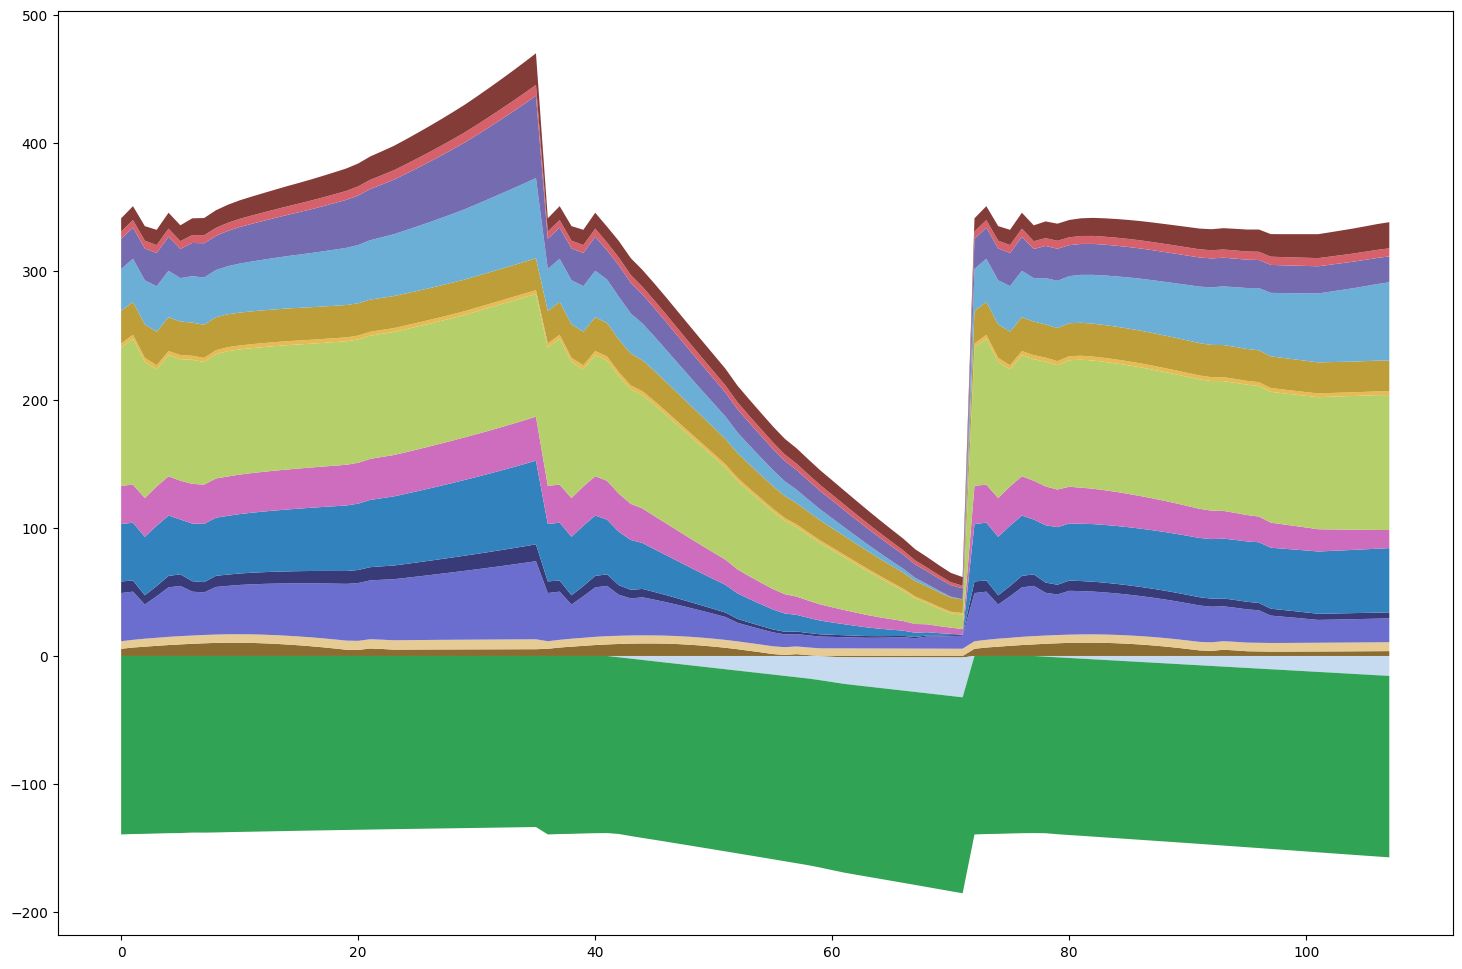

In [29]:
spp.plot_emissions_stack(df_out, matt, )

##  Generate summary files?


In [37]:
ssp.generate_summary_files(None, export = True, )

{'WIDE_INPUTS_OUTPUTS':      primary_id region  time_period  area_agrc_crops_bevs_and_spices  \
 0             0   peru            0                    369318.579985   
 1             0   peru            1                    375945.705353   
 2             0   peru            2                    399672.576875   
 3             0   peru            3                    452799.979433   
 4             0   peru            4                    480494.319528   
 ..          ...    ...          ...                              ...   
 103       70070   peru           31                    584117.140971   
 104       70070   peru           32                    588424.412168   
 105       70070   peru           33                    592855.861732   
 106       70070   peru           34                    597434.474871   
 107       70070   peru           35                    602175.869061   
 
      area_agrc_crops_cereals  area_agrc_crops_fibers  area_agrc_crops_fruits  \
 0              68

# Bulid Dataset for 202506 model with data we have

- Pull data fromo original repo (df_peru_base)
- Update with latest data (from new repo)
- Fill in values for new vars using `temp_update_fields_from_wv_to_main`
- Check if anything is missing

In [42]:
importlib.reload(dc)
construct = dc.SISEPUEDEDataConstructs(
    path_output_database = "/Users/usuario/git/sisepuede_data_pipeline/sisepuede_inputs.sqlite",
)

path_repo = pathlib.Path("/Users/usuario/SISEPUEDE_DATA_REPOSITORY")
repo = pu.Repository(
    {
        "local": {
            "path": str(path_repo)
        }
    }
)

,iso_alpha_3,year,ef_lndu_conv_wetlands_to_wetlands_gg_co2_ha,frac_agrc_cereals_cl1_temperate,ef_lndu_conv_croplands_to_grasslands_gg_co2_ha,pij_lndu_settlements_to_croplands,pop_lvst_initial_horses,frac_lvst_mm_goats_anaerobic_lagoon,pij_lndu_forests_primary_to_settlements,frac_lvst_mm_chickens_daily_spread,...,efficfactor_entc_technology_fuel_use_st_flywheels,physparam_waso_k_chemical_industrial,elasticity_agrc_bevs_and_spices_demand_to_income,efficfactor_entc_technology_fuel_use_st_pumped_hydro,nemomod_entc_total_annual_min_capacity_investment_pp_hydropower_gw,nemomod_entc_reserve_margin_tag_technology_pp_geothermal,nemomod_entc_renewable_energy_tag_pp_hydropower,nemomod_entc_frac_min_share_production_pp_waste_incineration,qty_frst_biomass_consumed_by_fire_tropical_mangroves_tonne_per_ha,gasrf_trww_biogas_treated_advanced_aerobic
0,TZA,2015,0.0,0.250215,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
1,TZA,2016,0.0,0.250215,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
2,TZA,2017,0.0,0.250215,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
3,TZA,2018,0.0,0.250215,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
4,TZA,2019,0.0,0.250215,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,LKA,2046,0.0,0.015828,0.0,0.0,1338.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
104,LKA,2047,0.0,0.015828,0.0,0.0,1338.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
105,LKA,2048,0.0,0.015828,0.0,0.0,1338.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0
106,LKA,2049,0.0,0.015828,0.0,0.0,1338.0,0.0,0.0,0.166667,...,0.85,0.094,0.3,0.75,-999.0,1.0,1.0,0.0,0.0,0.0


In [122]:
_REGION_ISO = "LKA"
_REGION_NAME = regions.return_region_or_iso(_REGION_ISO)


In [123]:
import sys
path_add = pathlib.Path("/Users/usuario/git/temporary_new_model_data_conversion")
if str(path_add) not in sys.path:
    sys.path.append(str(path_add))
import temp_update_fields_from_wv_to_main as temp 

examples = sxl.SISEPUEDEExamples()
df_example_input = examples("input_data_frame")

# get from original repo
df_peru_base = (
    pd.read_csv(path_data_base)
    .rename(
        columns = {
            "iso_code3": regions.field_iso,
            "Year": time_periods.field_year,
        }
    )
)

# get from pipeline
df_from_pipeline = construct.build_inputs_from_database(
    regions_keep = [_REGION_NAME],
)


# add in pipeline-based data
df_peru = sf.match_df_to_target_df(
    df_peru_base[
        df_peru_base[regions.field_iso].isin([_REGION_ISO])
    ],
    
    df_from_pipeline
    .drop(columns = [regions.field_iso]),
    
    [
        construct.time_periods.field_year,
    ],
    overwrite_only = False,
)

##  PULL FROM EXAMPLE DF

# fields not in peru
fields_missing = [
    x for x in df_example_input.columns 
    if (x not in df_peru.columns) 
    and (x in matt.all_variable_fields_input)
]

# specify fields to pull from the example
fields_from_ex = [
    x for x in fields_missing 
    if not (
        x.startswith("factor_lndu")
        or x.startswith("frac_lndu_")
    )
]

fields_from_ex = [
    x for x in fields_from_ex
    if (x not in df_peru.columns)
]

fields_from_ex += [x for x in df_peru if "frac_wali" in x and "_ww_" in x]

# merge in from ex
df_peru = sf.match_df_to_target_df(
    df_peru,
    df_example_input[fields_from_ex + [time_periods.field_time_period]],
    [
        construct.time_periods.field_time_period,
    ],
    overwrite_only = False,
)


#pd.merge(
#    df_peru,
#    df_example_input[fields_from_ex + [time_periods.field_time_period]],
#)


##  TEMPORARY SCRIPT FOR MOVING FROM working_version TO latest full version

df_peru = temp.update_fields(
    df_peru,
    matt,
)

# add in key
df_peru[regions.key] = _REGION_NAME

# TEMP
"""
if _REGION_ISO == "LKA":
    vars_off = [
        #"NemoMod MinShareProduction",
        "NemoMod TotalAnnualMaxCapacity",
        "NemoMod TotalAnnualMaxCapacityInvestment"
    ]
    for modvar in vars_off:
        modvar = matt.get_variable(modvar)
        df_peru[modvar.fields] = -999
"""

adding field factor_lndu_soil_carbon_pastures
adding field factor_lndu_soil_management_supremum_pastures
adding field factor_lndu_soil_management_unimproved_pastures
adding field frac_lndu_improved_pastures
adding field frac_lndu_increasing_net_exports_met_pastures
adding field frac_lndu_increasing_net_imports_met_pastures
adding field frac_lndu_pastures_cl1_temperate
adding field frac_lndu_pastures_cl1_tropical
adding field frac_lndu_pastures_cl2_dry
adding field frac_lndu_pastures_cl2_wet
adding field frac_lndu_receiving_fertilizer_pastures
adding field frac_lndu_soil_mineral_pastures
adding field frac_lndu_soil_mineral_shrublands
adding field frac_lndu_soil_mineral_wetlands
adding field factor_lndu_soil_carbon_flooded
adding field factor_lndu_soil_carbon_shrublands
adding field frac_lndu_soil_mineral_flooded
adding field frac_lndu_utilization_rate_pastures


In [128]:
df_run_enerprod = models(df_peru, include_electricity_in_energy = True, )

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


In [131]:
df_peru.to_csv(
    path_data.joinpath(f"sisepuede_raw_global_inputs_{_REGION_NAME}.csv"),
    encoding = "UTF-8", 
    index = None,
)

# Try running to make sure it works and looks reasonable

In [61]:
models = sm.SISEPUEDEModels(
    matt,
    fp_julia = file_struct.dir_jl,
    fp_nemomod_reference_files = file_struct.dir_ref_nemo,
)
df_run_enerprod = models(df_peru, include_electricity_in_energy = True, )

/Users/usuario/git/sisepuede/sisepuede/utilities/_toolbox.py:2575: UserWarning: Warning passed from optional_log: Set Julia directory for modules and environment to '/Users/usuario/git/sisepuede/sisepuede/julia'..
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/usuario/git/sisepuede/sisepuede/utilities/_toolbox.py:2575: UserWarning: Warning passed from optional_log: Importing Julia....
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/usuario/git/sisepuede/sisepuede/utilities/_toolbox.py:2575: UserWarning: Warning passed from optional_log: Successfully initialized JuMP optimizer from solver module HiGHS..
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/usuario/git/sisepuede/sisepuede/utilities/_toolbox.py:2575: UserWarning: Warning passed from optional_log: Running AFOLU model.
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/usuario/git/sisepuede/sisepuede/core/model_attributes.py:2465: UserWarning: Integrati

In [72]:
df_run[[x for x in df_run.columns if "emission_co2e_subsector_total" in x]]

,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_ccsq,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_ippu,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_soil,emission_co2e_subsector_total_trns
0,23.527001,0.0,-91.879462,15.260097,9.970565,83.486138,14.696291,111.374780,16.664576,14.395974,0.051954
1,23.666555,0.0,-91.646217,15.783556,10.198238,101.416905,14.923793,113.154086,17.586173,15.468269,0.058533
2,24.105025,0.0,-90.697516,16.314697,10.342963,67.293118,15.294200,116.024145,18.547563,16.436536,0.065967
3,24.041553,0.0,-90.757571,16.763425,10.259526,97.389210,15.304032,116.121419,19.413343,17.026049,0.072057
4,23.920200,0.0,-89.833043,17.249604,10.280188,99.427191,15.809665,120.013788,20.359146,18.154307,0.079298
5,24.287209,0.0,-89.205188,17.421236,10.153955,97.024167,16.099898,122.200474,20.830548,19.114269,0.079378
6,24.613691,0.0,-88.598823,17.797653,10.328228,104.413633,16.231215,123.281097,21.443326,20.073718,0.088257
7,25.135517,0.0,-87.931336,18.203693,10.321951,110.765127,16.453299,125.002830,22.273550,21.154991,0.094787
8,25.774160,0.0,-87.198950,18.660879,10.360214,116.055208,16.717018,127.052613,23.203501,22.277999,0.103099
9,26.490901,0.0,-86.417602,19.174333,10.402520,120.515278,17.007558,129.317850,24.247555,23.398135,0.113473


In [70]:
df_run = models(df_peru, include_electricity_in_energy = True, )

In [57]:
warnings.resetwarnings()

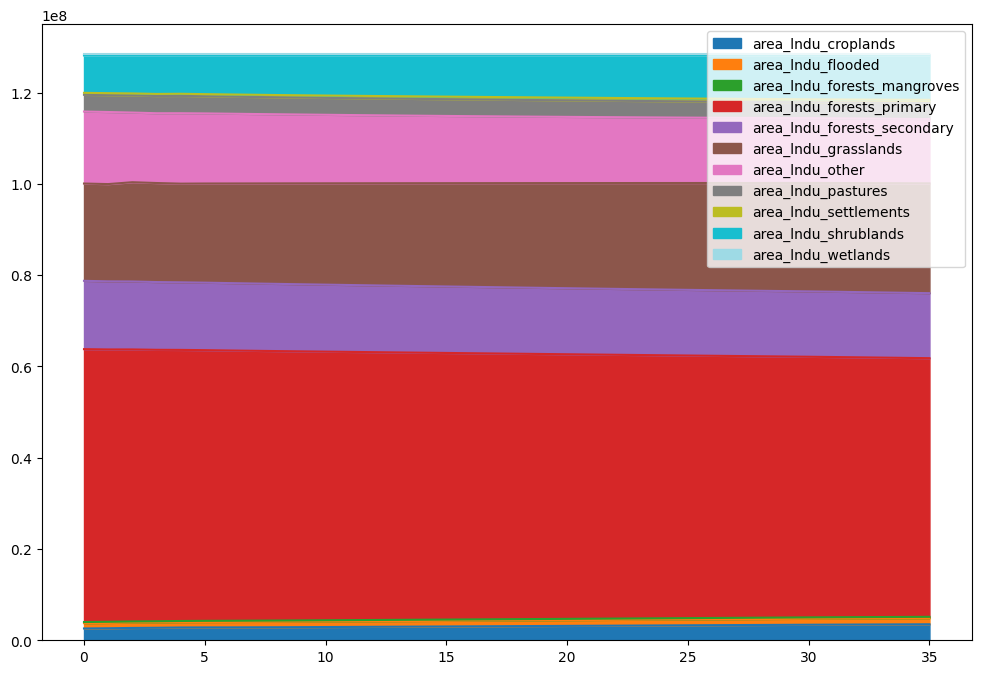

In [40]:
modvar = matt.get_variable("Land Use Area", )
fig, ax = plt.subplots(figsize = (12, 8))
df_run_enerprod[modvar.fields].plot.area(cmap = "tab20", ax = ax, )
ax.legend(loc = "upper right")


In [212]:
vals = matt.get_attribute_table("Liquid Waste").key_values
for k in vals:
    print(k)

ww_domestic_rural
ww_domestic_urban
ww_industrial


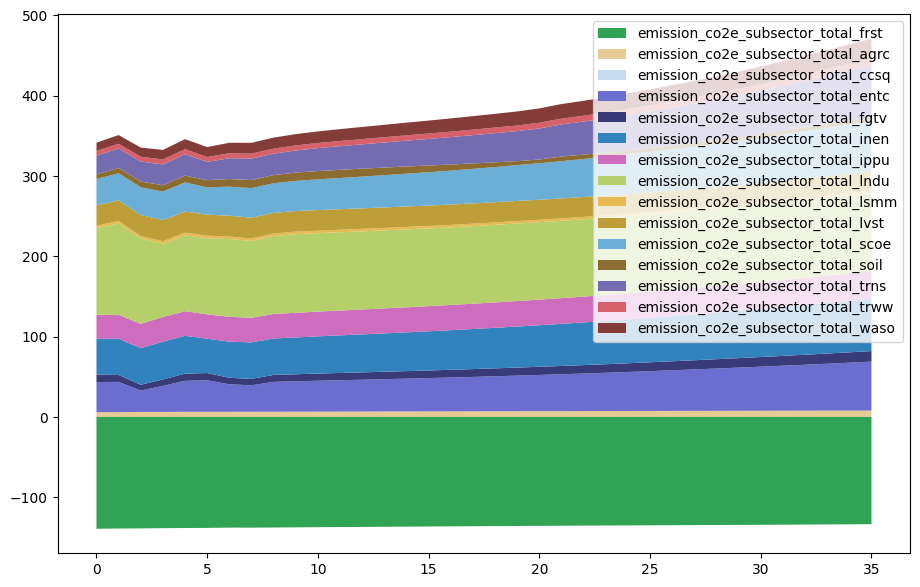

In [42]:
fig, ax = plt.subplots(figsize = (11, 7))
spp.plot_emissions_stack(
    df_run_enerprod,
    matt,
    figtuple = (fig, ax),
)

ax.legend()


# Skip here to run model

In [104]:
df_peru.to_csv(
    dir_data.joinpath("sisepuede_raw_global_inputs_peru.csv"),
    encoding = "UTF-8",
    index = None,
)

In [168]:
skip = 0


In [202]:
import sisepuede.transformers.transformers as trf2
importlib.reload(trf2)

transformers = trf2.Transformers(
    {},
    df_input = df_peru,
)



In [19]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

all_primaries = sorted(list(df_out[ssp.key_primary].unique()))

# build if unable to simply read the data frame
if df_in is None:
    df_in = []
     
    for region in ssp.regions:
        for primary in all_primaries: 
            df_in_filt = ssp.generate_scenario_database_from_primary_key(primary)
            df_in.append(df_in_filt.get(region))
    
    df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)


df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)





# check output directory 
dir_pkg = os.path.join(
    ssp.file_struct.dir_out, 
    f"sisepuede_summary_results_run_{ssp.id_fs_safe}"
)
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None


for tab in ["ATTRIBUTE_STRATEGY"]:
    ssp.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = (
    ssp
    .odpt_primary
    .get_indexing_dataframe(
        sorted(list(df_out[ssp.key_primary].unique()))
    )
)
    
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

(
    ssp.model_attributes.get_dimensional_attribute_table(
        ssp.model_attributes.dim_time_period
    )
    .to_csv(
        os.path.join(dir_pkg, f"ATTRIBUTE_TIME_PERIOD.csv"),
    )
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{ssp.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

In [28]:
dir_pkg

'/Users/usuario/git/sisepuede/sisepuede/out/sisepuede_summary_results_run_sisepuede_run_2025-07-02T12;15;10.622334'